<a href="https://colab.research.google.com/github/herb171/Prog2_11th/blob/main/work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 日経平均株価と特定銘柄のチャート化
[1]下準備<br>
これらをまず実行してください。


In [ ]:
!pip install japanize-matplotlib

In [25]:
import pandas as pd
import japanize_matplotlib
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import requests

In [ ]:
! wget 'https://indexes.nikkei.co.jp/nkave/historical/nikkei_stock_average_daily_jp.csv'

## 日経平均株価のチャート化
[2]日経平均株価をグラフ表示します。<br>
これらを実行してください。

In [27]:
df = pd.read_csv('nikkei_stock_average_daily_jp.csv', encoding='Shift-JIS')

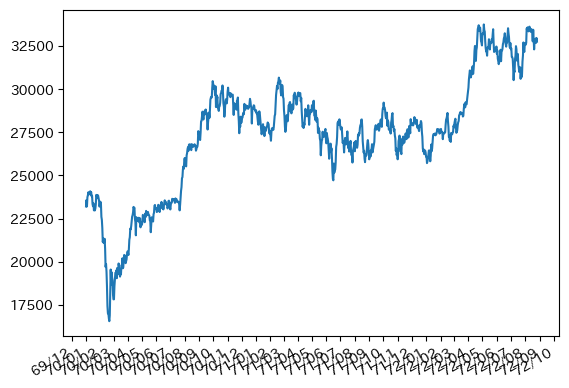

In [28]:
plt.plot(df['データ日付'], df['終値'])
#plt.plot(df['データ日付'], df['始値'])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%y/%m"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.show()

# 特定銘柄のチャート化
[3]株の銘柄とコードの表です。<br>
ここはざっと流し見で大丈夫です。

In [39]:
url = 'https://www.jpx.co.jp/markets/statistics-equities/misc/tvdivq0000001vg2-att/data_j.xls'
r = requests.get(url)

with open('data_j.xls', 'wb') as output:
  output.write(r.content)

stocklist = pd.read_excel("./data_j.xls")
stocklist.set_index('コード', inplace=True)
stocklist[['銘柄名']]
#stocklist.loc[stocklist["市場・商品区分"]=="市場第一部（内国株）",
#              ["コード","銘柄名","33業種コード","33業種区分","規模コード","規模区分"]
#             ]

,銘柄名
コード,
1301,極洋
1305,ｉＦｒｅｅＥＴＦ ＴＯＰＩＸ（年１回決算型）
1306,ＮＥＸＴ ＦＵＮＤＳ ＴＯＰＩＸ連動型上場投信
1308,上場インデックスファンドＴＯＰＩＸ
1309,ＮＥＸＴ ＦＵＮＤＳ ＣｈｉｎａＡＭＣ・中国株式・上証５０連動型上場投信
...,...
9993,ヤマザワ
9994,やまや
9995,グローセル


[4]銘柄名を入力すると、銘柄コード等を確認できます。

In [43]:
meigara = []
m = input('銘柄を教えてください:')
meigara.append(m)


mei_inf = stocklist.query('銘柄名 in @meigara')
print(str(mei_inf))



銘柄を教えてください:やまや
            日付  銘柄名       市場・商品区分 33業種コード 33業種区分 17業種コード 17業種区分 規模コード  \
コード                                                                     
9994  20231130  やまや  スタンダード（内国株式）    6100    小売業      14    小売      7   

               規模区分  
コード                  
9994  TOPIX Small 2  


[5]上で調べた銘柄コードを入力してください。<br>
その銘柄のグラフを表示します。


銘柄コードを４けた入力してください:9994


<Axes: xlabel='Date'>

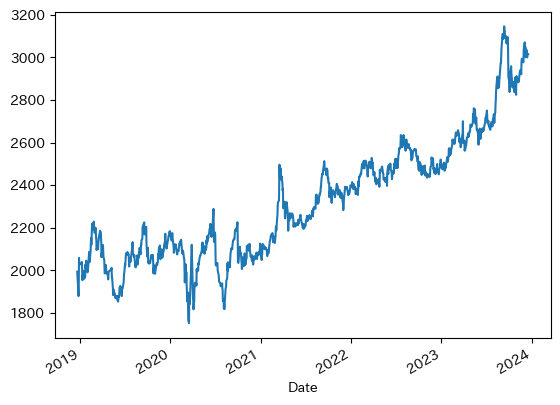

In [48]:
import pandas_datareader.data as pdr

text = '{}.jp'
mei_num = input('銘柄コードを４けた入力してください:')
mei_code = text.format(mei_num)

df2 = pdr.DataReader(mei_code, 'stooq').sort_index()
df2['Close'].plot()
